Import necessary libraries

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

Load a pretrained model (VGG16)

In [ ]:
model = models.vgg16(pretrained=True)
model.eval()  # Set to evaluation mode

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Load image

In [ ]:
# Define image URL
animal_url = "https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"

# Load and preprocess image
def load_and_preprocess_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

image_tensor = load_and_preprocess_image(animal_url)

Visualize CNN filters

    First Convolutional Layer (model.features[0]) is selected.

    Forward Pass: The image is passed through this layer.

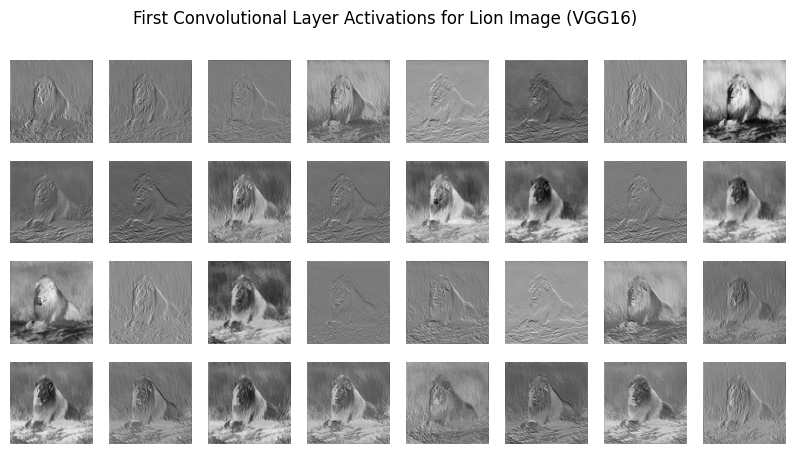

In [ ]:
# Pass the image through the first convolutional layer
first_conv_layer = model.features[0]
with torch.no_grad():
    activations = first_conv_layer(image_tensor)

# Normalize activations for visualization
def normalize_activation(tensor):
    min_val, max_val = tensor.min(), tensor.max()
    return (tensor - min_val) / (max_val - min_val)

activations = normalize_activation(activations)

# Plot activations
fig, axes = plt.subplots(4, 8, figsize=(10, 5))  # VGG16 first layer has 64 filters
for i, ax in enumerate(axes.flat):
    if i < activations.shape[1]:
        ax.imshow(activations[0, i].cpu().numpy(), cmap='gray')  # Show first channel of each activation
        ax.axis('off')
plt.suptitle("First Convolutional Layer Activations for Lion Image (VGG16)")
plt.show()

Summary of What the Code Does

    Loads the pre-trained VGG16 model.

    Downloads and preprocesses an image (resizing, normalization).

    Passes the image through the first convolutional layer.

    Extracts and normalizes feature maps.

    Visualizes the activations of the first convolutional layer.